# Astro 9

# Lecture 11: Data Fitting

In [1]:
#standard preamble
import numpy as np
import matplotlib.pyplot as plt
#New import statement
import scipy.optimize as fitter

## Fitting

The simplest technique to describe is least-squares fitting. Usually you use the least-squares fit if you have a graph (i.e. a set of data points $y_i(x_i)$), you want to describe it in terms of a model $y(x;\theta)$, where parameters $\theta$ are unknown. You fit to determine the values of $\theta$ and (hopefully) their uncertainties.  

There are two standard cases where least-squares method is applicable:
1. You know errors for each data point $\sigma_i$ and you know that those errors are Gaussian. In this case, you minimize $\chi^2=\sum \left(\frac{y_i - y(x_i;\theta)}{\sigma_i}\right)^2$. The value of the $\chi^2_{\min}$ can be interpreted as a goodness-of-fit, and the errors on parameters $\theta$ have probabilistic interpretation
1. You know that the errors are Gaussian and are the same for each data point, but you do not know their magnitude. In this case, you would minimize the sum of squares: $\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. In this case the value of $\mathcal{S}$ can be used to compute the errors $\sigma_i$ for each data point, and the errors on $\theta$ have probabilistic definition, but you lose information about the goodness of fit
1. If the errors are not known to be Gaussian, then the least square method is not useful to estimate uncertainties or the goodness of fit. It is also not guaranteed to be unbiased or most efficient. 

These are all the techniques you would use to calculate a fit by hand. Let's take a look at what python has built in for you.

## np.polyfit

In [2]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [3]:
p = np.poly1d(z)
p(0.5)

0.614384920634922

In [4]:
p(3.5)

-0.3473214285714268

In [5]:
p(10)

22.579365079364877

In [7]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    p30 = np.poly1d(np.polyfit(x, y, 30))


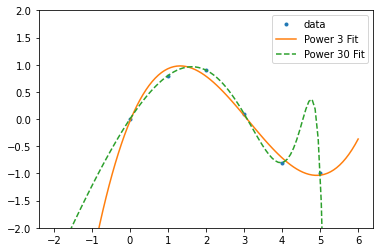

In [11]:
import matplotlib.pyplot as plt
xp = np.linspace(-2, 6, 100)
plt.plot(x, y, '.', label='data')
plt.plot(xp, p(xp), '-', label='Power 3 Fit')
plt.plot(xp, p30(xp), '--', label='Power 30 Fit')
plt.ylim(-2,2)
plt.legend()

This method works well for certain situations but is limited in others. Let's look at a more universal solution.

## Scipy's curve_fit

Let's start with an example from earlier this week

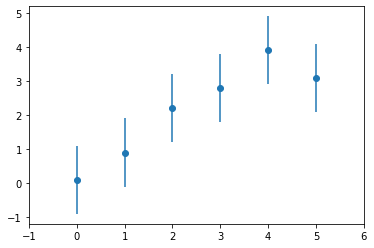

In [12]:
a0 = 0
b0 = 1
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,3.1])
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])

# plot it
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
plt.show()

Now define a the model:

In [13]:
# linear function
def model(x, a, b):
    return a + b*x

The fitter needs a good initial guess of parameters (more on that later):

[0.40952381 0.70285714]
[[ 0.19750113 -0.05386395]
 [-0.05386395  0.02154558]]
a= 0.410+/-0.444
b= 0.703+/-0.147
[[ 1.         -0.82572283]
 [-0.82572283  1.        ]]
chi^2 =  1.51
chi^2/d.f.= 0.38


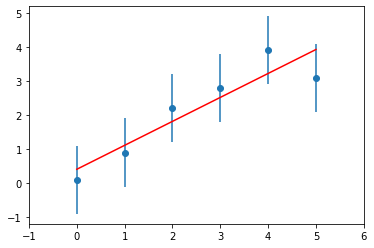

In [14]:
# Initial guess.
par0    = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(model, xdata, ydata, p0=par0, sigma=sigma)
print (par)
print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],np.sqrt(cov[1,1])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((model(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.show()

[-0.11428571  1.48857143 -0.15714286]
[[ 0.16053059 -0.11516325  0.01744898]
 [-0.11516325  0.14203469 -0.02617347]
 [ 0.01744898 -0.02617347  0.00523469]]
a=-0.114+/-0.401
b= 1.489+/-0.377
c=-0.157+/-0.072
[[ 1.         -0.76267202  0.60192927]
 [-0.76267202  1.         -0.95988329]
 [ 0.60192927 -0.95988329  1.        ]]
chi^2 =  0.59
chi^2/d.f.= 0.20


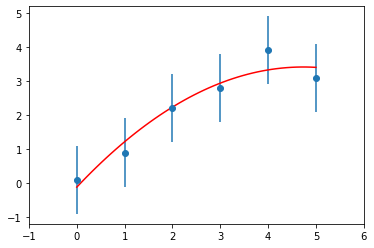

In [17]:
# quadratic function
def model2(x, a, b, c):
    return a + b*x + c*x*x

par0    = np.array([0.0, 1.0, 0.0])
par, cov = fitter.curve_fit(model2, xdata, ydata, par0, sigma)
print (par)
print (cov)

# decode it now
print ('a={0:6.3f}+/-{1:5.3f}'.format(par[0],np.sqrt(cov[0,0])))
print ('b={0:6.3f}+/-{1:5.3f}'.format(par[1],np.sqrt(cov[1,1])))
print ('c={0:6.3f}+/-{1:5.3f}'.format(par[2],np.sqrt(cov[2,2])))

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((model2(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,model2(xfit,par[0],par[1], par[2]),'r-')
plt.show()

[-0.11428571  1.48857143 -0.15714286]
[[ 0.16053062 -0.11516326  0.01744898]
 [-0.11516326  0.14203468 -0.02617347]
 [ 0.01744898 -0.02617347  0.00523469]]
[[ 1.         -0.76267202  0.60192925]
 [-0.76267202  1.         -0.95988328]
 [ 0.60192925 -0.95988328  1.        ]]
chi^2 =  0.59
chi^2/d.f.= 0.20


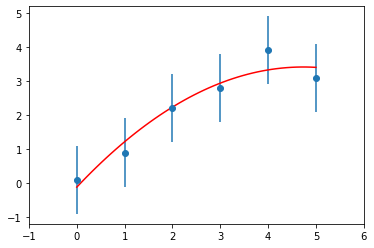

In [18]:
# Nth-order poly function
def modelN(*arg):
    x = arg[0]
    N = len(arg)-1
    sum = arg[1]
    for i in range(1,N):
        sum += arg[i+1]*x**i
    return sum

N=2   # poly degree
par0    = np.zeros(N+1)
par[1]=1
par, cov = fitter.curve_fit(modelN, xdata, ydata, par0, sigma)
print (par)
print (cov)

corr = cov.copy() # copy shape
# compute correlation matrix
for i in range(len(par)):
    for j in range(len(par)):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])
        
print (corr)

# compute reduced chi2
chi_squared = np.sum(((modelN(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f}'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared))

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,6)
xfit = np.linspace(0,5,50)
plt.plot(xfit,modelN(xfit,*par),'r-')
plt.show()

Let's look at another example with a clear answer for the correct fit

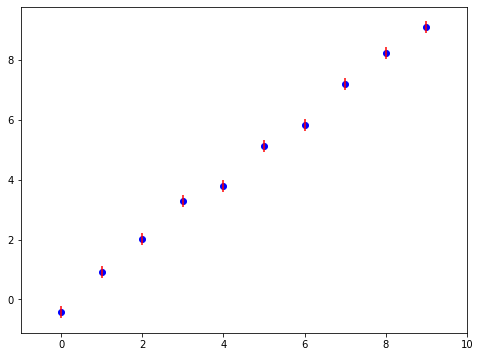

In [26]:
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
sig = 0.2
Npoints = 10
xdata = np.arange(0,Npoints,1.)
ydata = a0+xdata*b0+sig*np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig

plt.figure(figsize=(8,6))
plt.scatter(xdata,ydata,color='b')
plt.errorbar(xdata,ydata, sigma, color='r',ls='none')
plt.xlim(-1,Npoints)
plt.show()

Your model's parameters and their uncertainties are the following: 

a=-0.166+/-0.118 

b= 1.038+/-0.022 


Your model's chi^2 value and reduced chi^2 value and their uncertainties are the following: 

chi^2 =  7.53 

chi^2/d.f.= 0.94 



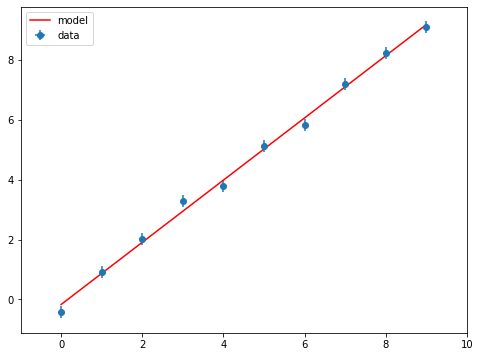

In [27]:
# Make sure you run the cell above this first to generate some artificial data
# to which we will fit this curve

#=============================================================================================
# Define a fit model. For this part, we will use a linear function
# The function which defines your model HAS TO TAKE ON A SPECIFIC FORM
#=============================================================================================

def model(x, a, b):
    return a + b*x

# You have to supply an initial guess of parameters, and they should be "close enough" to the true values, otherwise
# the fit may fall into a false minimum
par0    = np.array([0.5, -0.3]) # initial guess for parameters
par, cov = fitter.curve_fit(model, xdata, ydata, par0, sigma, absolute_sigma=True)

#=============================================================================================
# the par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
#=============================================================================================

print("Your model's parameters and their uncertainties are the following: \n")
a = par[0]
ea = np.sqrt(cov[0,0])
print('a={0:6.3f}+/-{1:5.3f} \n'.format(a,ea))
b = par[1]
eb = np.sqrt(cov[1,1])
print('b={0:6.3f}+/-{1:5.3f} \n\n'.format(b,eb))

#=============================================================================================
# compute reduced chi2
#=============================================================================================

print("Your model's chi^2 value and reduced chi^2 value and their uncertainties are the following: \n")
chi_squared = np.sum(((ydata - model(xdata, *par))/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print ('chi^2 = {0:5.2f} \n'.format(chi_squared))
print ('chi^2/d.f.={0:5.2f} \n'.format(reduced_chi_squared))

#=============================================================================================
# overlay plot over data
#=============================================================================================

plt.figure(figsize=(8,6))
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o', label='data') #plotting the data
plt.xlim(-1,Npoints)
xfit = np.linspace(0,Npoints-1.,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-', label='model') #plotting the model
plt.legend()
plt.show()

### New Example: Fitting a Histogram

(0.010840393514560138, 1.0206214486921885)


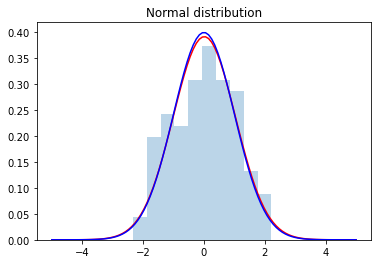

In [22]:
#NEW IMPORT
from scipy.stats import norm


# generate 100 events from a normal distrubution
# with mean 0 and standard deviation 1
sample = norm.rvs(loc=0,scale=1,size=100) 

par = norm.fit(sample) # distribution fitting

#hist(sample,20)

print (par)

# now, par[0] and par[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])
# original distribution
pdf = norm.pdf(x)

plt.title('Normal distribution')
plt.hist(sample, density=True, alpha=.3)
plt.plot(x,pdf_fitted,'r-',x,pdf,'b-')
plt.show()

## Root Finding

Consider a polynomial

$f(x) = x^3 - 100 x^2 - x +100$

Let's Find the roots

### With scipy.optimize.root

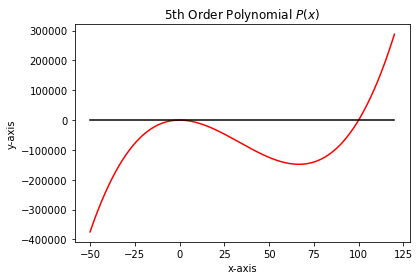

array([  1., 100.])

In [37]:
from scipy.optimize import root

def P(x):
    y = x**3 - 100*x**2 - x + 100
    return y


x = np.linspace(-50, 120,1000)
zer = np.zeros(1000)
plt.figure()
plt.title("5th Order Polynomial $P(x)$")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,P(x),"r-",label="P(x)")
plt.plot(x,zer,"k-",label="y=0")
plt.show()

sol = root(P, [2, 80])
sol.x

### With scipy.optimize.fsolve

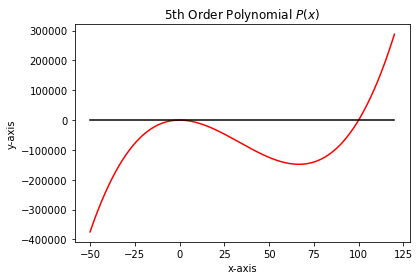

array([  1., 100.])

In [35]:
from scipy.optimize import fsolve

def P(x):
    y = x**3 - 100*x**2 - x + 100
    return y


x = np.linspace(-50, 120,1000)
zer = np.zeros(1000)
plt.figure()
plt.title("5th Order Polynomial $P(x)$")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,P(x),"r-",label="P(x)")
plt.plot(x,zer,"k-",label="y=0")
plt.show()

roots = fsolve(P, [2, 80])
roots